# Credit (Bank Loan) Data Case study - 

# 1-  Problem statement: 

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.


# 2 - Import required libraries and load the data

In [255]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

#import the libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [256]:
# load current application data in to dataframe - 
df_application_data = pd.read_csv('application_data.csv')
print (df_application_data.shape)

(307511, 122)


In [257]:
df_application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [258]:

# df_application_data.info(verbose=True, null_counts=True)

In [259]:
# df_pre_application_data.info()

In [260]:
# Generate descriptive statistics.- Summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
df_application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [261]:
# Lets observe null values in dataframe
df_application_data.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   202929
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

In [262]:
# Create a function to list a number of null values with percentage for any given dataframe
def missing_values_table(df):
    # calculate missing values count for all columns
    mis_val = df.isnull().sum()
    
    # calculate missing values percentage for all columns
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # concatenate missling value count and missing percentage values ia dataframe
    df_table = pd.concat([mis_val_percent,
                          mis_val], 
                         axis=1)
    
     # rename column for df_table
    df_table = df_table.rename(columns = { 0 : 'null value %', 1 : 'Missing Values'})
    
    df_table = df_table[df_table.iloc[:,1] != 0].sort_values('null value %', ascending=False).round(1)
    
    print ("Given dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
        "There are " + str(df_table.shape[0]) + " columns that have missing values.")
    
    return df_table

In [263]:
# Lets observenull number of null values and percentage in give dataframe
null_values_table = missing_values_table(df_application_data)
null_values_table

Given dataframe has 122 columns and 307511 Rows.
There are 67 columns that have missing values.


,null value %,Missing Values
COMMONAREA_MEDI,69.9,214865
COMMONAREA_AVG,69.9,214865
COMMONAREA_MODE,69.9,214865
NONLIVINGAPARTMENTS_MEDI,69.4,213514
NONLIVINGAPARTMENTS_MODE,69.4,213514
NONLIVINGAPARTMENTS_AVG,69.4,213514
FONDKAPREMONT_MODE,68.4,210295
LIVINGAPARTMENTS_MODE,68.4,210199
LIVINGAPARTMENTS_MEDI,68.4,210199
LIVINGAPARTMENTS_AVG,68.4,210199


Conclusion - These are 67 columns with null values, we have to take care of these null values before begin with analysis.

# 3 - Cleaning the Missing Data

### 3.1 - Remove columns having more then 30% null values, as these columns can skewed our analysis.

In [264]:
# Removing these 64 columns from df_application_data dataframe
null_column_list_30p = null_values_table[null_values_table['null value %']>0.3].index
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n')
print('There are '+ str(len(null_column_list_30p))+ ' columns with more then 30% missing values\n.')
print('Following are the list of column to be deleted -')
print(null_column_list_30p)
# drop these columns
df_application_data.drop(null_column_list_30p,axis=1,inplace=True)
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n')
print('Shape of df_application_data dataframe after deleting these null values columns (more then 30%) is '+ str(df_application_data.shape))

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

There are 58 columns with more then 30% missing values
.
Following are the list of column to be deleted -
Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAPARTMENTS_AVG', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAPARTMENTS_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI',
       'FLOORSMIN_AVG', 'YEARS_BUILD_MODE', 'YEARS_BUILD_MEDI',
       'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_AVG', 'LANDAREA_MEDI',
       'LANDAREA_MODE', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MEDI',
       'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'ELEVATORS_MEDI',
       'ELEVATORS_MODE', 'ELEVATORS_AVG', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MODE', 'APARTMENTS_MEDI', 'APARTMENTS_AVG',
       'ENTRANCES_MODE', 'ENT

Conclusion - We have removed 58 columns with more then 30% of null values and now we remain with 64 columns in dataframe for further analysis.

### 3.2 - Remove unwanted columns from dataframe

In [265]:
# print list of columns
print(df_application_data.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60

In [266]:
# Removing unwanted column from the df_application_data
unwanted_columns=['FLAG_MOBIL', 
                  'FLAG_EMP_PHONE',
                  'FLAG_WORK_PHONE', 
                  'FLAG_CONT_MOBILE',
                  'FLAG_PHONE', 
                  'FLAG_EMAIL',
                  'REGION_RATING_CLIENT',
                  'REGION_RATING_CLIENT_W_CITY',
                  'FLAG_EMAIL',
                  'REGION_RATING_CLIENT',
                  'REGION_RATING_CLIENT_W_CITY',
                  'DAYS_LAST_PHONE_CHANGE',
                  'FLAG_DOCUMENT_2', 
                  'FLAG_DOCUMENT_3',
                  'FLAG_DOCUMENT_4', 
                  'FLAG_DOCUMENT_5',
                  'FLAG_DOCUMENT_6',
                  'FLAG_DOCUMENT_7',
                  'FLAG_DOCUMENT_8',
                  'FLAG_DOCUMENT_9',
                  'FLAG_DOCUMENT_10', 
                  'FLAG_DOCUMENT_11', 
                  'FLAG_DOCUMENT_12',
                  'FLAG_DOCUMENT_13', 
                  'FLAG_DOCUMENT_14', 
                  'FLAG_DOCUMENT_15',
                  'FLAG_DOCUMENT_16', 
                  'FLAG_DOCUMENT_17', 
                  'FLAG_DOCUMENT_18',
                  'FLAG_DOCUMENT_19', 
                  'FLAG_DOCUMENT_20', 
                  'FLAG_DOCUMENT_21',
                  'DAYS_ID_PUBLISH',
                  'WEEKDAY_APPR_PROCESS_START',
                  'HOUR_APPR_PROCESS_START',
                  'OBS_30_CNT_SOCIAL_CIRCLE',
                  'DEF_30_CNT_SOCIAL_CIRCLE',
                  'OBS_60_CNT_SOCIAL_CIRCLE', 
                  'DEF_60_CNT_SOCIAL_CIRCLE',
                  'EXT_SOURCE_2'
                 ]

print('Number of unwanted columns to be deleted is '+str(len(unwanted_columns)))
# remove unwanted list columns
df_application_data.drop(labels=unwanted_columns,axis=1,inplace=True)
print(df_application_data.shape)

Number of unwanted columns to be deleted is 40
(307511, 27)


Conclusion - Now we have 27 columns remaining to proceed with further analysis.

### 3.3 - Now lets looks at columns having less then 30% null values

In [267]:
df_application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,1.0,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,2.0,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,1.0,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,2.0,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,1.0,0,0,0,0,1,1,Religion


List columns having less them 30% of null values  and handle these column one by one to either impute or remove records from dataframe

In [268]:
null_value_column_30per = missing_values_table(df_application_data)
null_value_column_30per

Given dataframe has 27 columns and 307511 Rows.
There are 3 columns that have missing values.


,null value %,Missing Values
AMT_GOODS_PRICE,0.1,278
AMT_ANNUITY,0.0,12
CNT_FAM_MEMBERS,0.0,2


 - Lets look "AMT_ANNUITY" column

In [269]:
# check for null values in AMT_ANNUITY
df = df_application_data['AMT_ANNUITY'].to_frame()
null_values_table = missing_values_table(df)
null_values_table

Given dataframe has 1 columns and 307511 Rows.
There are 1 columns that have missing values.


,null value %,Missing Values
AMT_ANNUITY,0.0,12


This is Loan annuity amount and there are 12 null values and as volume is very less, we can impute these 12 values to mean of this column.

In [270]:
mean_value=df_application_data['AMT_ANNUITY'].mean()
print ('Mean value -'+ str(mean_value))

df_application_data.loc[df_application_data['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=mean_value

Mean value -27108.573909183444


In [271]:
# check again for null values in AMT_ANNUITY to make sure values is imputed
df = df_application_data['AMT_ANNUITY'].to_frame()
null_values_table = missing_values_table(df)
null_values_table

Given dataframe has 1 columns and 307511 Rows.
There are 0 columns that have missing values.


,null value %,Missing Values


- Lets look CNT_FAM_MEMBERS column

In [272]:
# check for null values in CNT_FAM_MEMBERS
df = df_application_data['CNT_FAM_MEMBERS'].to_frame()
null_values_table = missing_values_table(df)
null_values_table

Given dataframe has 1 columns and 307511 Rows.
There are 1 columns that have missing values.


,null value %,Missing Values
CNT_FAM_MEMBERS,0.0,2


In [273]:
df_application_data['CNT_FAM_MEMBERS'].value_counts(dropna=False)

 2.0     158357
 1.0      67847
 3.0      52601
 4.0      24697
 5.0       3478
 6.0        408
 7.0         81
 8.0         20
 9.0          6
 10.0         3
 14.0         2
 16.0         2
 12.0         2
NaN           2
 20.0         2
 11.0         1
 13.0         1
 15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

There are two records have null number of family members and majority records are having 2 family members, so lets impute null values with 2 to take care null records in this column.

In [274]:
# replace with 2
df_application_data.loc[df_application_data['CNT_FAM_MEMBERS'].isnull(),'CNT_FAM_MEMBERS']=2.0

In [275]:
# check for null values in CNT_FAM_MEMBERS
df = df_application_data['CNT_FAM_MEMBERS'].to_frame()
null_values_table = missing_values_table(df)
null_values_table

Given dataframe has 1 columns and 307511 Rows.
There are 0 columns that have missing values.


,null value %,Missing Values


- Lets look AMT_GOODS_PRICE column for missing values.

In [276]:
# check for null values in AMT_GOODS_PRICE
df = df_application_data['AMT_GOODS_PRICE'].to_frame()
null_values_table = missing_values_table(df)
null_values_table

Given dataframe has 1 columns and 307511 Rows.
There are 1 columns that have missing values.


,null value %,Missing Values
AMT_GOODS_PRICE,0.1,278


In [277]:
mean_value=df_application_data['AMT_GOODS_PRICE'].mean()
print ('Mean value -'+ str(mean_value))
df_application_data.loc[df_application_data['AMT_GOODS_PRICE'].isnull(),'AMT_GOODS_PRICE']=mean_value


Mean value -538396.2074288895


In [278]:
df = df_application_data['AMT_GOODS_PRICE'].to_frame()
null_values_table = missing_values_table(df)
null_values_table

Given dataframe has 1 columns and 307511 Rows.
There are 0 columns that have missing values.


,null value %,Missing Values


In [279]:
# check for any missing value in final dataset df_application_data
null_values_table = missing_values_table(df_application_data)
null_values_table

Given dataframe has 27 columns and 307511 Rows.
There are 0 columns that have missing values.


,null value %,Missing Values


Now we do not have any null value in df_application_data.

In [280]:
df_application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,2.152664,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.454517,3.692794e+05,0.013831,4363.988632,141275.766519,3522.886321,0.910679,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [281]:
df_application_data.sample(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
109549,227051,0,Cash loans,F,Y,N,1,148500.0,755190.0,49693.5,675000.0,Working,Secondary / secondary special,Married,Rented apartment,0.022625,-13518,-369,-7314.0,3.0,0,0,0,0,0,0,Business Entity Type 3
23703,127580,0,Cash loans,M,Y,Y,1,315000.0,521280.0,28408.5,450000.0,Working,Secondary / secondary special,Married,Co-op apartment,0.030755,-11135,-488,-142.0,3.0,0,0,0,0,0,0,Emergency
276071,419927,0,Cash loans,F,N,Y,0,166500.0,733176.0,23782.5,612000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.009334,-14451,-651,-7540.0,2.0,0,0,0,0,0,0,Business Entity Type 3
193954,324906,0,Cash loans,F,N,N,0,171000.0,675000.0,19737.0,675000.0,Working,Secondary / secondary special,Married,House / apartment,0.025164,-19407,-11402,-11808.0,2.0,0,0,0,0,0,0,Kindergarten
180908,309654,0,Cash loans,F,N,Y,0,90000.0,547344.0,25492.5,472500.0,Pensioner,Secondary / secondary special,Married,House / apartment,0.046220,-21353,365243,-2199.0,2.0,0,0,0,0,0,0,XNA


In [282]:
df_application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 27 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307511 non-null float64
AMT_GOODS_PRICE                307511 non-null float64
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
REGION_POPULATION_RELATIVE     307511 non-null float64
DAYS_BIRTH             

Now we have dataframe without null values. and respective columns datatype also looks correct to proceed with analysis

### 3.4 - Derived columns

Now we have following two columns, that can help us to derive some relavaent information.
 - DAYS_BIRTH
 - DAYS_EMPLOYED
 - Binning for continuous column (AMT_INCOME_TOTAL and AMT_CREDIT)

In [283]:
df_application_data[['DAYS_BIRTH','DAYS_EMPLOYED']].head(10)

,DAYS_BIRTH,DAYS_EMPLOYED
0,-9461,-637
1,-16765,-1188
2,-19046,-225
3,-19005,-3039
4,-19932,-3038
5,-16941,-1588
6,-13778,-3130
7,-18850,-449
8,-20099,365243
9,-14469,-2019


In [284]:
# we can derive age from DAY_BIRTS column -
print(df_application_data.shape)
df_application_data['AGE'] = df_application_data['DAYS_BIRTH'].apply(lambda x:x/-365)
print(df_application_data.shape)

(307511, 27)
(307511, 28)


In [285]:
df_application_data['AGE'].sample(5)

118231    39.893151
256267    42.186301
57593     58.912329
34742     38.997260
1129      27.693151
Name: AGE, dtype: float64

In [286]:
# Created YEARS_EMPLOYED column derived from DAYS_EMPLOYED
print(df_application_data.shape)
df_application_data['YEARS_EMPLOYED'] = df_application_data['DAYS_EMPLOYED'].apply(lambda x:x/-365)
print(df_application_data.shape)

(307511, 28)
(307511, 29)


In [287]:
df_application_data['YEARS_EMPLOYED'].sample(5)

289159       3.997260
101935       9.098630
190389   -1000.665753
284402       2.493151
167445       4.756164
Name: YEARS_EMPLOYED, dtype: float64

In [288]:
# Creating bins for AMT_INCOME_TOTAL and AMT_CREDIT columns
bins = [0, 100000, 200000,300000,400000]
#Binning AMT_INCOME_TOTAL coloumn
df_application_data['binned_AMT_INCOME_TOTAL'] = pd.cut(df_application_data['AMT_INCOME_TOTAL'], bins)
#Binning AMT_CREDIT coloumn
df_application_data['binned_AMT_CREDIT'] = pd.cut(df_application_data['AMT_CREDIT'], bins)

In [289]:
df_application_data.shape

(307511, 31)

In [290]:
df_application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AGE,YEARS_EMPLOYED,binned_AMT_INCOME_TOTAL,binned_AMT_CREDIT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,1.0,0,0,0,0,0,0,Business Entity Type 3,25.920548,1.745205,"(200000, 300000]",NaN
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,2.0,0,0,0,0,0,0,School,45.931507,3.254795,"(200000, 300000]",NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,1.0,0,0,0,0,0,0,Government,52.180822,0.616438,"(0, 100000]","(100000, 200000]"
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,2.0,0,0,0,0,0,0,Business Entity Type 3,52.068493,8.326027,"(100000, 200000]","(300000, 400000]"
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,1.0,0,0,0,0,1,1,Religion,54.608219,8.323288,"(100000, 200000]",NaN


Now we have dataframe with following four additional columns 
    - AGE
    - binned_AMT_INCOME_TOTAL
    - binned_AMT_CREDIT
    - YEARS_EMPLOYED.
Hence now we have dataframe with 31 columns.

# 4 - Data Quality and Outliers

 Looking these remaining 31 columns and understand data quality and Outliers

#### 4.1 - First lets look categorical variable as following -
- TARGET
- NAME_CONTRACT_TYPE 
- CODE_GENDER
- FLAG_OWN_CAR
- FLAG_OWN_REALTY
- CNT_CHILDREN
- CNT_FAM_MEMBERS
- NAME_INCOME_TYPE
- NAME_EDUCATION_TYPE
- NAME_FAMILY_STATUS
- NAME_HOUSING_TYPE
- ORGANIZATION_TYPE

In [291]:
# 'TARGET'
count = df_application_data['TARGET'].value_counts(dropna=False)
percentage = df_application_data['TARGET'].value_counts(dropna=False, normalize=True)

pd.concat([count,round(percentage*100,2)], axis=1, keys=['counts', '%'])

,counts,%
0,282686,91.93
1,24825,8.07


Observations - 

- Target variable data looks good.
(1 - Client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample,
0 - all other cases (assuming non difficulties))

- Data values is spread across 1 and 0.
- 92% of data is belongs to non-difficulties

In [292]:
# NAME_CONTRACT_TYPE 
count = df_application_data['NAME_CONTRACT_TYPE'].value_counts(dropna=False)
percentage = df_application_data['NAME_CONTRACT_TYPE'].value_counts(dropna=False, normalize=True)
pd.concat([count,round(percentage*100,2)], axis=1, keys=['counts', '%'])

,counts,%
Cash loans,278232,90.48
Revolving loans,29279,9.52


Observations -
- NAME_CONTRACT_TYPE Column looks good and distributed among case loans and Revolving loans
- 90% of data is belongs to Cash loans

In [293]:
# 'CODE_GENDER'
count = df_application_data['CODE_GENDER'].value_counts(dropna=False)
percentage = df_application_data['CODE_GENDER'].value_counts(dropna=False, normalize=True)
pd.concat([count,round(percentage*100,2)], axis=1, keys=['counts', '%'])

,counts,%
F,202448,65.83
M,105059,34.16
XNA,4,0.00


In [294]:
# Four records need to be imputed or removed, XNA does not looks accurate.
# Updating the column 'CODE_GENDER' with "F" for the dataset as Female data is having majority.
df_application_data['CODE_GENDER'] = df_application_data['CODE_GENDER'].apply(lambda x:'F' if x == 'XNA' else x )
df_application_data['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

Observations - 
 -  Female applicant are twice with respect to male applicant populations.

In [295]:
# FLAG_OWN_CAR
count = df_application_data['FLAG_OWN_CAR'].value_counts(dropna=False)
percentage = df_application_data['FLAG_OWN_CAR'].value_counts(dropna=False, normalize=True)
pd.concat([count,round(percentage*100,2)], axis=1, keys=['counts', '%'])

,counts,%
N,202924,65.99
Y,104587,34.01


Observations - 
 - This column is good and says 65% of applicant own the car.

In [296]:
# 'FLAG_OWN_REALTY', 
count = df_application_data['FLAG_OWN_REALTY'].value_counts(dropna=False)
percentage = df_application_data['FLAG_OWN_REALTY'].value_counts(dropna=False, normalize=True)
pd.concat([count,round(percentage*100,2)], axis=1, keys=['counts', '%'])

,counts,%
Y,213312,69.37
N,94199,30.63


Observations - 
 - This column is good and says ~70% of applicant own real state property.

In [297]:
# CNT_CHILDREN
count = df_application_data['CNT_CHILDREN'].value_counts(dropna=False)
percentage = df_application_data['CNT_CHILDREN'].value_counts(dropna=False, normalize=True)
pd.concat([count,round(percentage*100,2)], axis=1, keys=['counts', '%'])

,counts,%
0,215371,70.04
1,61119,19.88
2,26749,8.70
3,3717,1.21
4,429,0.14
5,84,0.03
6,21,0.01
7,7,0.00
14,3,0.00
19,2,0.00


we can see few ourliers here, lets explore this little more.

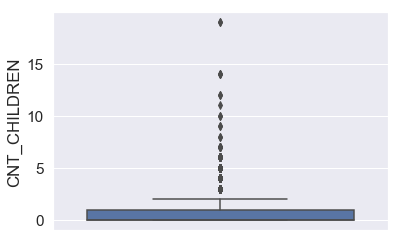

In [298]:
sns.boxplot(x=df_application_data['CNT_CHILDREN'],orient='v')
plt.show()

after observing outliers, we can conclude to remove CNT_CHILDREN more then 2 as 70%,19% and 8% applicant population belongs to 0,1,2 respectivaly.

In [299]:
# Removing outliers
print(df_application_data.shape)
df_application_data = df_application_data[~(df_application_data['CNT_CHILDREN']>2)]
print(df_application_data.shape)

(307511, 31)
(303239, 31)


In [300]:
# CNT_FAM_MEMBERS
count = df_application_data['CNT_FAM_MEMBERS'].value_counts(dropna=False)
percentage = df_application_data['CNT_FAM_MEMBERS'].value_counts(dropna=False, normalize=True)
pd.concat([count,round(percentage*100,2)], axis=1, keys=['counts', '%'])

,counts,%
2.0,158359,52.22
1.0,67847,22.37
3.0,52601,17.35
4.0,24432,8.06


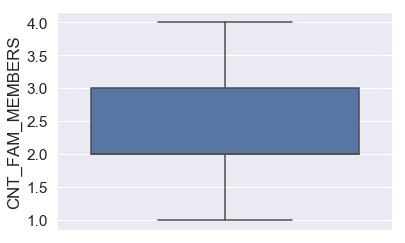

In [301]:
sns.boxplot(x=df_application_data['CNT_FAM_MEMBERS'],orient='v')
plt.show()

CNT_FAM_MEMBERS looks good and 52.22% values belongs to 2 family members.

In [302]:
# NAME_INCOME_TYPE
count = df_application_data['NAME_INCOME_TYPE'].value_counts(dropna=False)
percentage = df_application_data['NAME_INCOME_TYPE'].value_counts(dropna=False, normalize=True)
pd.concat([count,round(percentage*100,2)], axis=1, keys=['counts', '%'])

,counts,%
Working,155918,51.42
Commercial associate,70735,23.33
Pensioner,55253,18.22
State servant,21278,7.02
Unemployed,22,0.01
Student,18,0.01
Businessman,10,0.00
Maternity leave,5,0.00


NAME_INCOME_TYPE columns looks good. 52% applicant population belongs to Working income class type

In [303]:
# NAME_EDUCATION_TYPE
count = df_application_data['NAME_EDUCATION_TYPE'].value_counts(dropna=False)
percentage = df_application_data['NAME_EDUCATION_TYPE'].value_counts(dropna=False, normalize=True)
pd.concat([count,round(percentage*100,2)], axis=1, keys=['counts', '%'])

,counts,%
Secondary / secondary special,215193,70.96
Higher education,73962,24.39
Incomplete higher,10177,3.36
Lower secondary,3746,1.24
Academic degree,161,0.05


NAME_EDUCATION_TYPE columns looks good. 71% applicant population belongs to Secondary / secondary special education type

In [304]:
# NAME_FAMILY_STATUS
count = df_application_data['NAME_FAMILY_STATUS'].value_counts(dropna=False)
percentage = df_application_data['NAME_FAMILY_STATUS'].value_counts(dropna=False, normalize=True)
pd.concat([count,round(percentage*100,2)], axis=1, keys=['counts', '%'])

,counts,%
Married,192767,63.57
Single / not married,45346,14.95
Civil marriage,29471,9.72
Separated,19632,6.47
Widow,16021,5.28
Unknown,2,0.00


Observations - 
 - ~64% applicant population belongs to Married class and this is highest.

In [305]:
# We have 2 records with Unknown status and we have majority for Married as 64%, so imputing Unknown to Married will help us.
df_application_data['NAME_FAMILY_STATUS'] = df_application_data['NAME_FAMILY_STATUS'].apply(lambda x:'Married' if x == 'Unknown' else x)
df_application_data['NAME_FAMILY_STATUS'].value_counts(dropna = False)

Married                 192769
Single / not married     45346
Civil marriage           29471
Separated                19632
Widow                    16021
Name: NAME_FAMILY_STATUS, dtype: int64

Observations - 
- NAME_FAMILY_STATUS columns looks good. 
- Imputed unknown to married as 64% applicant population belongs to Married family status.

In [306]:
# NAME_HOUSING_TYPE
count = df_application_data['NAME_HOUSING_TYPE'].value_counts(dropna=False)
percentage = df_application_data['NAME_HOUSING_TYPE'].value_counts(dropna=False, normalize=True)
pd.concat([count,round(percentage*100,2)], axis=1, keys=['counts', '%'])

,counts,%
House / apartment,269034,88.72
With parents,14694,4.85
Municipal apartment,11038,3.64
Rented apartment,4812,1.59
Office apartment,2569,0.85
Co-op apartment,1092,0.36


NAME_HOUSING_TYPE columns looks good. 88% applicant population belongs to House / apartment housing type.

In [307]:
# ORGANIZATION_TYPE
count = df_application_data['ORGANIZATION_TYPE'].value_counts(dropna=False)
percentage = df_application_data['ORGANIZATION_TYPE'].value_counts(dropna=False, normalize=True)
pd.concat([count,round(percentage*100,2)], axis=1, keys=['counts', '%'])

,counts,%
Business Entity Type 3,67048,22.11
XNA,55265,18.22
Self-employed,37768,12.45
Other,16348,5.39
Medicine,11029,3.64
Business Entity Type 2,10394,3.43
Government,10207,3.37
School,8682,2.86
Trade: type 7,7723,2.55
Kindergarten,6668,2.20


In [308]:
df_application_data['ORGANIZATION_TYPE'] = df_application_data['ORGANIZATION_TYPE'].apply(lambda x:'Other' if x=='XNA' else x)
df_application_data['ORGANIZATION_TYPE'].value_counts(dropna=False).head()

Other                     71613
Business Entity Type 3    67048
Self-employed             37768
Medicine                  11029
Business Entity Type 2    10394
Name: ORGANIZATION_TYPE, dtype: int64

#### 4.2 - Lets look continous variable as following -
- AGE
- YEARS_EMPLOYED
- AMT_GOODS_PRICE
- AMT_ANNUITY
- AMT_CREDIT 
- AMT_INCOME_TOTAL

In [309]:
# define a function to see 75 percentile of values in continous variables
def p75(x):
    return np.quantile(x,0.75)

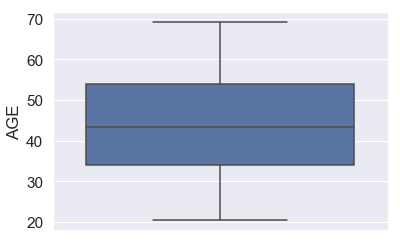

In [310]:
# AGE
sns.boxplot(data =df_application_data, x='AGE',orient='v')
plt.show()

AGE data looks consistence and spread between 35 to 55 age for loan applicants.

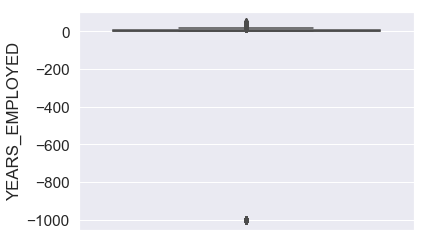

In [311]:
# YEARS_EMPLOYED
sns.boxplot(data =df_application_data, x='YEARS_EMPLOYED',orient='v')
plt.show()

Lets remove outliers.

In [312]:
print(df_application_data.shape)
df_application_data = df_application_data[df_application_data['YEARS_EMPLOYED']>-100]
print(df_application_data.shape)

(303239, 31)
(247974, 31)


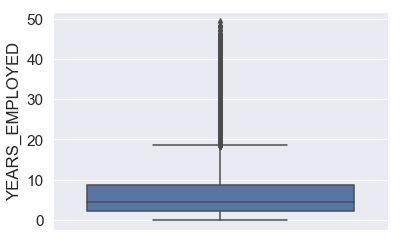

In [313]:
sns.boxplot(data =df_application_data, x='YEARS_EMPLOYED',orient='v')
plt.show()

In [314]:
# lets see how many records beyond 22 YEARS_EMPLOYED
df_application_data[~(df_application_data['YEARS_EMPLOYED']>15)].shape

(224828, 31)

In [315]:
# we can also remove it 
print(df_application_data.shape)
df_application_data = df_application_data[~(df_application_data['YEARS_EMPLOYED']>15)]
print(df_application_data.shape)

(247974, 31)
(224828, 31)


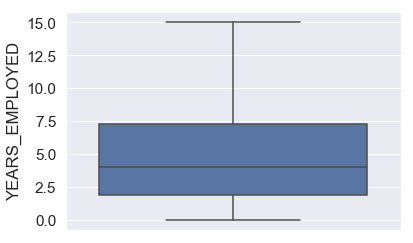

In [316]:
sns.boxplot(data =df_application_data, x='YEARS_EMPLOYED',orient='v')
plt.show()

now data looks good in shape after removing outliers for YEARS_EMPLOYED.

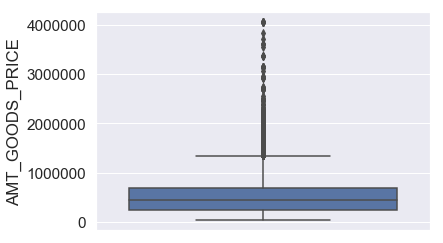

In [317]:
# AMT_GOODS_PRICE
sns.boxplot(x=df_application_data['AMT_GOODS_PRICE'],orient='v')
plt.show()

In [318]:
# Remove outliers
print(df_application_data.shape)
df_application_data = df_application_data[~(df_application_data['AMT_GOODS_PRICE']>1400000)]
print(df_application_data.shape)

(224828, 31)
(219227, 31)


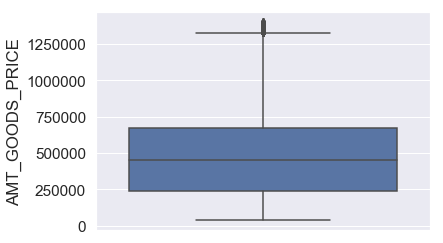

In [319]:
sns.boxplot(x=df_application_data['AMT_GOODS_PRICE'],orient='v')
plt.show()

Observations - 
 - We dropped the records above 1,400,000 to remove unusually high amount goods price from the dataframe.

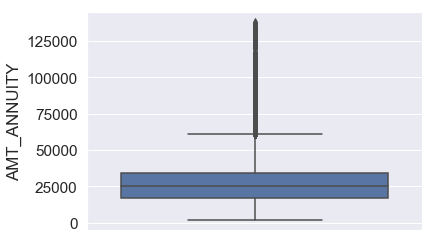

In [320]:
# AMT_ANNUITY
sns.boxplot(x=df_application_data['AMT_ANNUITY'],orient='v')
plt.show()

In [321]:
# Remove outliers
print(df_application_data.shape)
df_application_data = df_application_data[~(df_application_data['AMT_ANNUITY']>60000)]
print(df_application_data.shape)

(219227, 31)
(215149, 31)


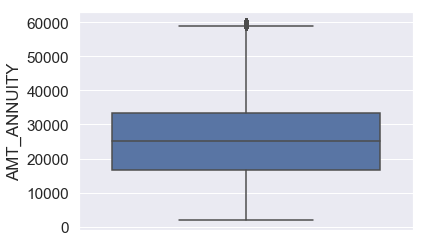

In [322]:
sns.boxplot(x=df_application_data['AMT_ANNUITY'],orient='v')
plt.show()

Observations - 
 - We dropped the records above 60,000 to remove unusually high amount annuity price from the dataframe.

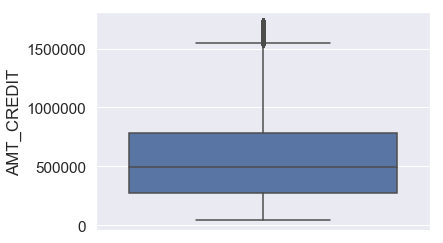

In [323]:
# AMT_CREDIT 
sns.boxplot(x=df_application_data['AMT_CREDIT'],orient='v')
plt.show()

In [324]:
# Remove outliers
print(df_application_data.shape)
df_application_data = df_application_data[~(df_application_data['AMT_CREDIT']>1500000)]
print(df_application_data.shape)

(215149, 31)
(212845, 31)


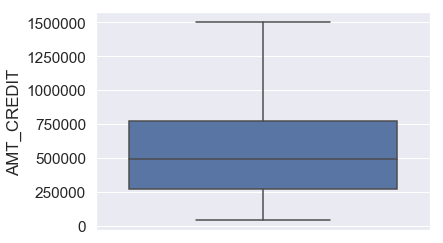

In [325]:
sns.boxplot(x=df_application_data['AMT_CREDIT'],orient='v')
plt.show()

Observations - 
 - We dropped the records above 1,500,000 to remove unusually high amount credit price from the dataframe.

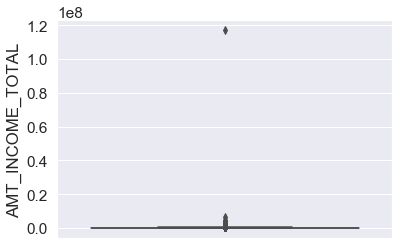

In [326]:
# AMT_INCOME_TOTAL 
sns.boxplot(x=df_application_data['AMT_INCOME_TOTAL'],orient='v')
plt.show()

(212845, 31)
(212844, 31)


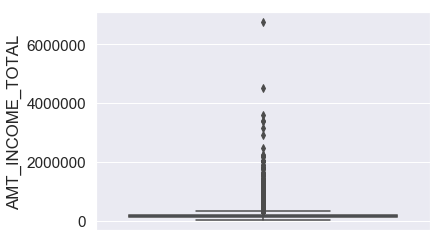

In [327]:
# Remove outliers
print(df_application_data.shape)
df_application_data = df_application_data[~(df_application_data['AMT_INCOME_TOTAL']>0.2*1e8)]
print(df_application_data.shape)

sns.boxplot(x=df_application_data['AMT_INCOME_TOTAL'],orient='v')
plt.show()

(212844, 31)
(212723, 31)


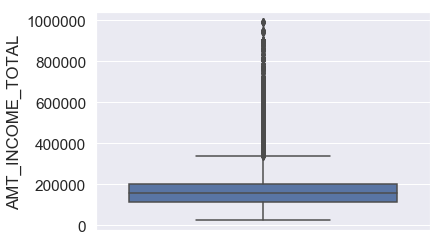

In [328]:
print(df_application_data.shape)
df_application_data = df_application_data[~(df_application_data['AMT_INCOME_TOTAL']>1000000)]
print(df_application_data.shape)

sns.boxplot(x=df_application_data['AMT_INCOME_TOTAL'],orient='v')
plt.show()

(212723, 31)
(198618, 31)


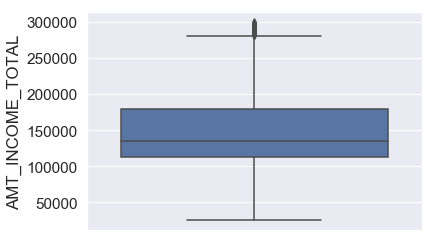

In [329]:
print(df_application_data.shape)
df_application_data = df_application_data[~(df_application_data['AMT_INCOME_TOTAL']>300000)]
print(df_application_data.shape)

sns.boxplot(x=df_application_data['AMT_INCOME_TOTAL'],orient='v')
plt.show()

Observations - 
 - We dropped the records above 300,000 to remove unusually high amount income from the dataframe.

#### 4.3 - Lets look other columns with binary nature -
- REG_REGION_NOT_LIVE_REGION
- REG_REGION_NOT_WORK_REGION
- LIVE_REGION_NOT_WORK_REGION
- REG_CITY_NOT_LIVE_CITY
- REG_CITY_NOT_WORK_CITY
- LIVE_CITY_NOT_WORK_CITY

In [330]:
# REG_REGION_NOT_LIVE_REGION
df_application_data['REG_REGION_NOT_LIVE_REGION'].value_counts(dropna=False)

0    195410
1      3208
Name: REG_REGION_NOT_LIVE_REGION, dtype: int64

In [331]:
# this column looks okay

In [332]:
# REG_REGION_NOT_WORK_REGION
df_application_data['REG_REGION_NOT_WORK_REGION'].value_counts(dropna=False)

0    187272
1     11346
Name: REG_REGION_NOT_WORK_REGION, dtype: int64

In [333]:
# this column looks okay

In [334]:
# LIVE_REGION_NOT_WORK_REGION
df_application_data['LIVE_REGION_NOT_WORK_REGION'].value_counts(dropna=False)

0    189694
1      8924
Name: LIVE_REGION_NOT_WORK_REGION, dtype: int64

In [335]:
# this column looks okay

In [336]:
# REG_CITY_NOT_LIVE_CITY
df_application_data['REG_CITY_NOT_LIVE_CITY'].value_counts(dropna=False)

0    179033
1     19585
Name: REG_CITY_NOT_LIVE_CITY, dtype: int64

In [337]:
# this column looks okay

In [338]:
# REG_CITY_NOT_WORK_CITY
df_application_data['REG_CITY_NOT_WORK_CITY'].value_counts(dropna=False)

0    139243
1     59375
Name: REG_CITY_NOT_WORK_CITY, dtype: int64

In [339]:
# this column looks okay

In [340]:
# LIVE_CITY_NOT_WORK_CITY
df_application_data['LIVE_CITY_NOT_WORK_CITY'].value_counts(dropna=False)

0    153217
1     45401
Name: LIVE_CITY_NOT_WORK_CITY, dtype: int64

In [341]:
# this column looks okay

In [342]:
# now dataframe looks good enough for analysis
print(df_application_data.shape)
df_application_data.head()

(198618, 31)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AGE,YEARS_EMPLOYED,binned_AMT_INCOME_TOTAL,binned_AMT_CREDIT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,1.0,0,0,0,0,0,0,Business Entity Type 3,25.920548,1.745205,"(200000, 300000]",NaN
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,2.0,0,0,0,0,0,0,School,45.931507,3.254795,"(200000, 300000]",NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,1.0,0,0,0,0,0,0,Government,52.180822,0.616438,"(0, 100000]","(100000, 200000]"
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,2.0,0,0,0,0,0,0,Business Entity Type 3,52.068493,8.326027,"(100000, 200000]","(300000, 400000]"
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,1.0,0,0,0,0,1,1,Religion,54.608219,8.323288,"(100000, 200000]",NaN


### 6 - Now we can devide prepared dataframe (df_application_data)  to two different dataframe with respect to TARGET column.

Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)

In [343]:
# TARGET
count = df_application_data['TARGET'].value_counts(dropna=False)
percentage = df_application_data['TARGET'].value_counts(dropna=False, normalize=True)
pd.concat([count,round(percentage*100,2)], axis=1, keys=['counts', '%'])

,counts,%
0,179819,90.54
1,18799,9.46


Observation - After removing missing and outliers values, TARGET variable is in ratio with respect to original dataframe. which means data integrity is maintained.

##### Now lets devide dataframe into to separate dataframes for TARGET variables "0" and "1" respectively.

In [344]:
# assuming target as 0 flag mean, there is no issues with this loan payments
print(df_application_data.shape)
df_application_data_0 = df_application_data[df_application_data['TARGET']==0]
# reset index
df_application_data_0.reset_index()
print(df_application_data_0.shape)

(198618, 31)
(179819, 31)


In [345]:
# target variable as 1 mean payment difficulties
print(df_application_data.shape)
df_application_data_1 = df_application_data[df_application_data['TARGET']==1]
# reset index
df_application_data_1.reset_index()
print(df_application_data_1.shape)

(198618, 31)
(18799, 31)


In [346]:
df_application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'AGE', 'YEARS_EMPLOYED',
       'binned_AMT_INCOME_TOTAL', 'binned_AMT_CREDIT'],
      dtype='object')

In [347]:
# list  the relavent column to see corelation between columns
corr_columns = [
                'AMT_INCOME_TOTAL',
                'AMT_CREDIT',
                'AMT_ANNUITY',
                'AMT_GOODS_PRICE'
               ]

In [348]:
corrMatrix = df_application_data[corr_columns].corr()

In [349]:
print(df_application_data_0.shape)
print(df_application_data_1.shape)

(179819, 31)
(18799, 31)


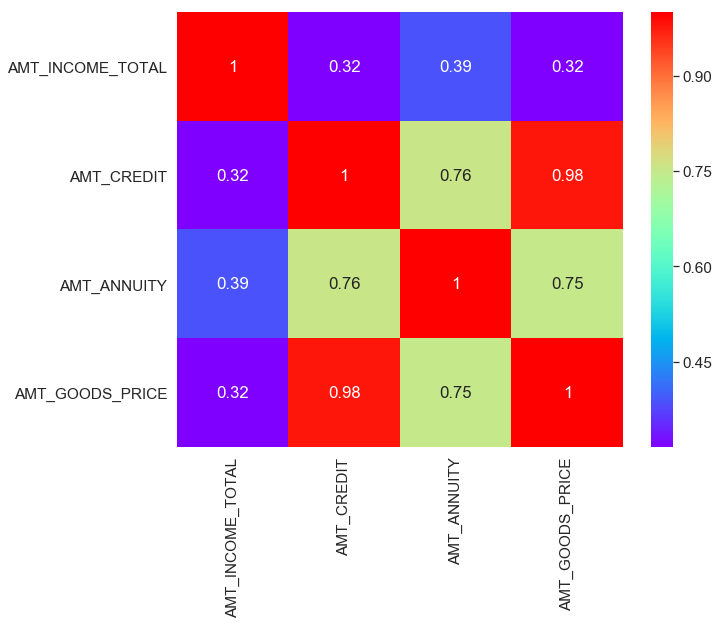

In [350]:
# Lets look corelations between columns
f, ax = plt.subplots(figsize =(10,8)) 
corrMatrix = df_application_data_0[corr_columns].corr()
sns.heatmap(corrMatrix, annot=True, ax = ax, cmap ="rainbow",)
plt.show()

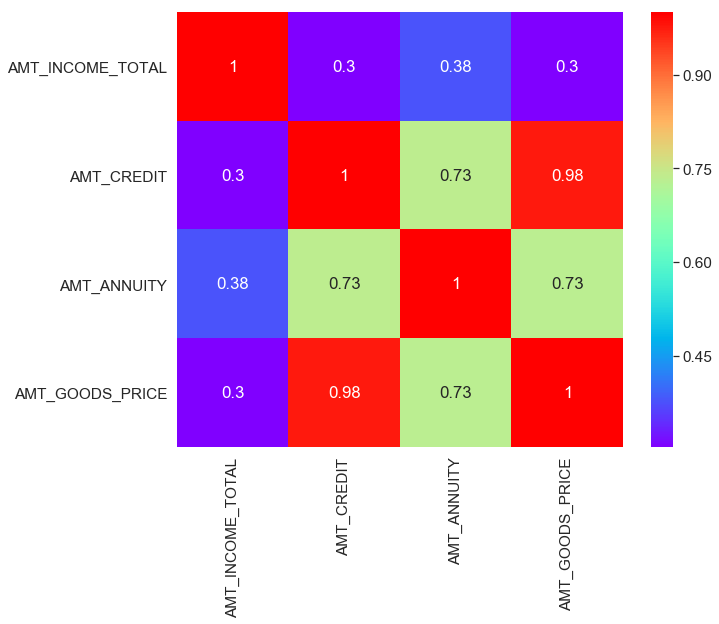

In [351]:
# Lets look corelations between columns
f, ax = plt.subplots(figsize =(10, 8)) 
corrMatrix1 = df_application_data_1[corr_columns].corr()
sns.heatmap(corrMatrix1, annot=True, ax = ax, cmap ="rainbow")
plt.show()

### 7 - Data Analysis

#### 7.1 - Univariate Analysis

In [352]:
df_application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AGE,YEARS_EMPLOYED,binned_AMT_INCOME_TOTAL,binned_AMT_CREDIT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,1.0,0,0,0,0,0,0,Business Entity Type 3,25.920548,1.745205,"(200000, 300000]",NaN
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,2.0,0,0,0,0,0,0,School,45.931507,3.254795,"(200000, 300000]",NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,1.0,0,0,0,0,0,0,Government,52.180822,0.616438,"(0, 100000]","(100000, 200000]"
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,2.0,0,0,0,0,0,0,Business Entity Type 3,52.068493,8.326027,"(100000, 200000]","(300000, 400000]"
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,1.0,0,0,0,0,1,1,Religion,54.608219,8.323288,"(100000, 200000]",NaN


##### 7.1.1 - Analysis for Univariate

- Categorical Variables

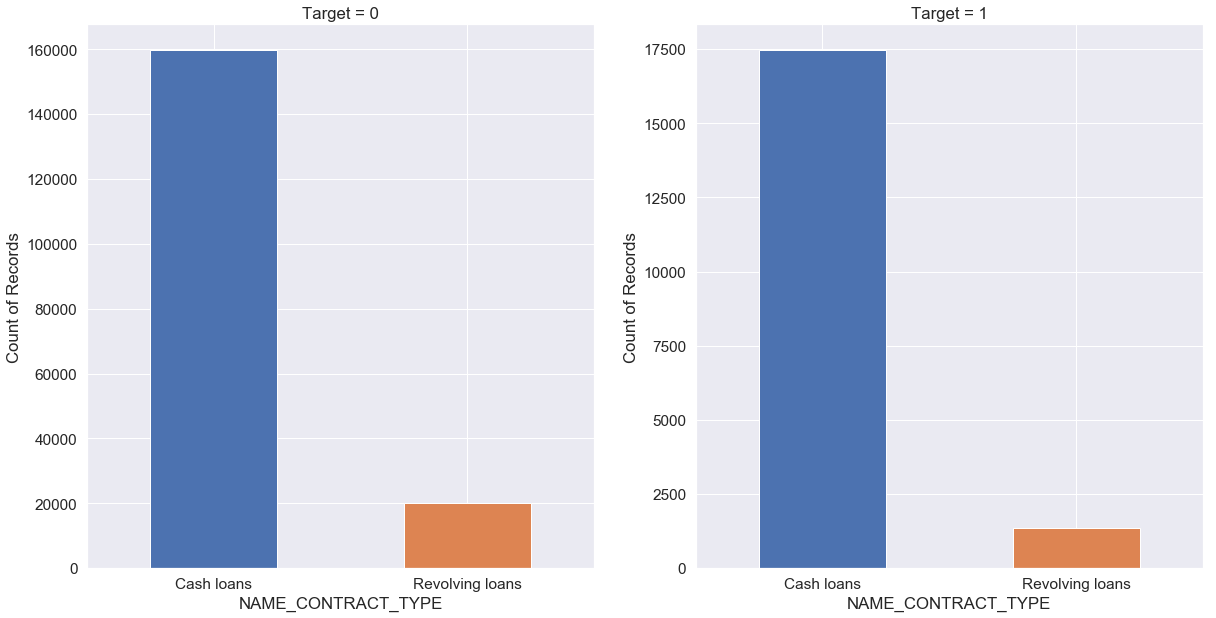

In [353]:
# NAME_CONTRACT_TYPE
plt.figure(figsize=(20,10))
sns.set(font_scale=1.4)

plt.subplot(1,2,1)
df_application_data_0['NAME_CONTRACT_TYPE'].value_counts().plot(kind='bar', rot=0)
plt.xlabel("NAME_CONTRACT_TYPE")
plt.ylabel("Count of Records")
plt.title("Target = 0");

plt.subplot(1,2,2)
df_application_data_1['NAME_CONTRACT_TYPE'].value_counts().plot(kind='bar', rot=0)
plt.xlabel("NAME_CONTRACT_TYPE")
plt.ylabel("Count of Records")
plt.title("Target = 1");

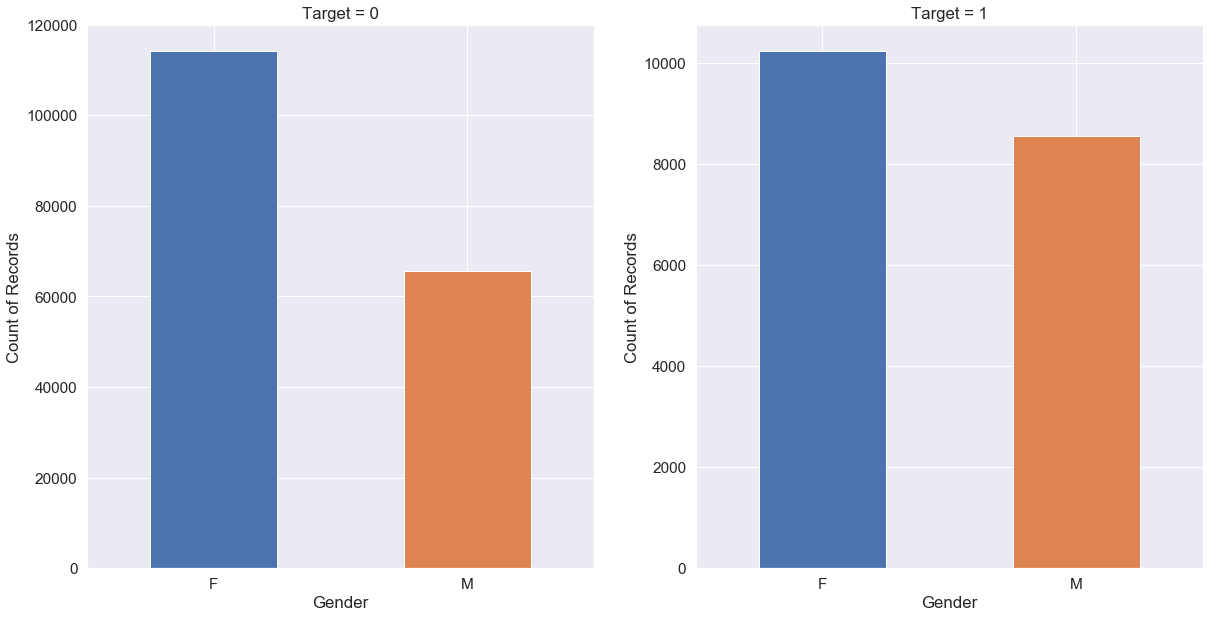

In [354]:
# CODE_GENDER
plt.figure(figsize=(20,10))
sns.set(font_scale=1.4)

plt.subplot(1,2,1)
df_application_data_0['CODE_GENDER'].value_counts().plot(kind='bar', rot=0)
plt.xlabel("Gender")
plt.ylabel("Count of Records")
plt.title("Target = 0");

plt.subplot(1,2,2)
df_application_data_1['CODE_GENDER'].value_counts().plot(kind='bar', rot=0)
plt.xlabel("Gender")
plt.ylabel("Count of Records")
plt.title("Target = 1");

Influences -
 - This is not giving any specific insights of data.
 - Males and Females are almost having same ratio with TARGET variables (0 and 1)

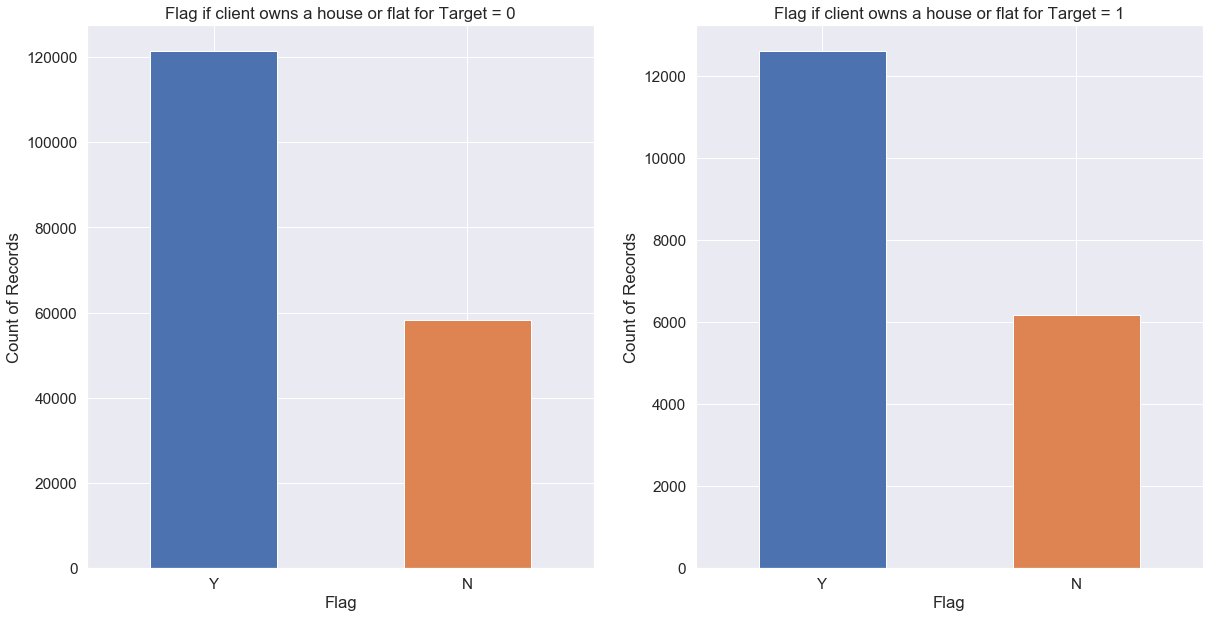

In [355]:
# FLAG_OWN_REALTY
plt.figure(figsize=(20,10))
sns.set(font_scale=1.4)

plt.subplot(1,2,1)
df_application_data_0['FLAG_OWN_REALTY'].value_counts().plot(kind='bar', rot=0)
plt.xlabel("Flag")
plt.ylabel("Count of Records")
plt.title("Flag if client owns a house or flat for Target = 0");

plt.subplot(1,2,2)
df_application_data_1['FLAG_OWN_REALTY'].value_counts().plot(kind='bar', rot=0)
plt.xlabel("Flag")
plt.ylabel("Count of Records")
plt.title("Flag if client owns a house or flat for Target = 1");

Influences -
 - This is not giving any specific insights of data.
 - FLAG_OWN_REALTY is almost having same ratio with TARGET variables (0 and 1)

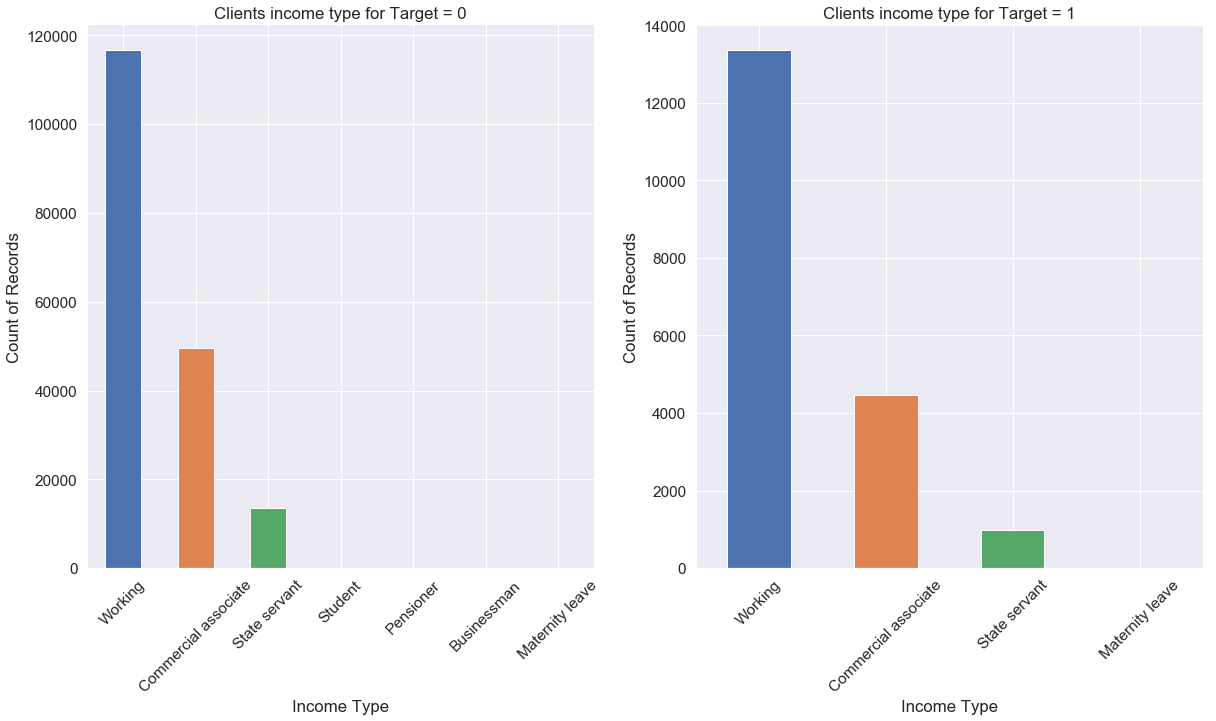

In [356]:
# NAME_INCOME_TYPE
plt.figure(figsize=(20,10))
sns.set(font_scale=1.4)

plt.subplot(1,2,1)
df_application_data_0['NAME_INCOME_TYPE'].value_counts().plot(kind='bar', rot=45)
plt.xlabel("Income Type")
plt.ylabel("Count of Records")
plt.title("Clients income type for Target = 0");

plt.subplot(1,2,2)
df_application_data_1['NAME_INCOME_TYPE'].value_counts().plot(kind='bar', rot=45)
plt.xlabel("Income Type")
plt.ylabel("Count of Records")
plt.title("Clients income type for Target = 1");


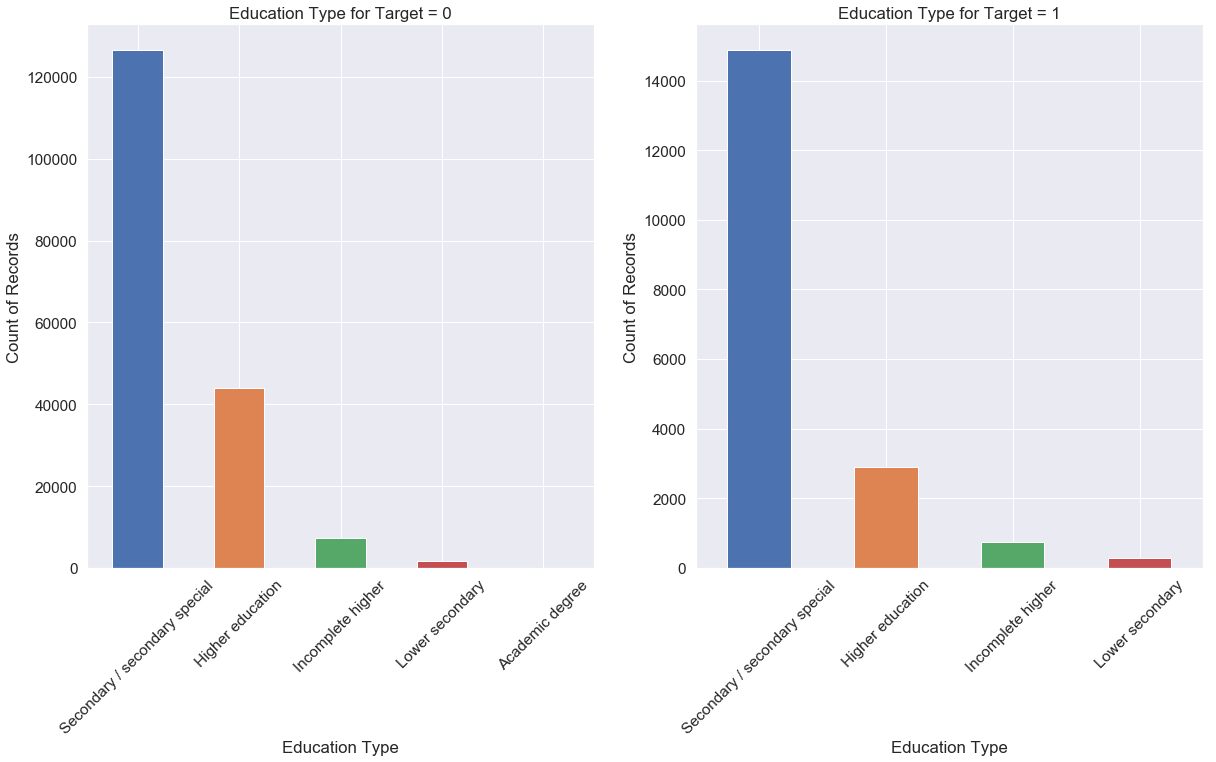

In [357]:
# NAME_EDUCATION_TYPE
plt.figure(figsize=(20,10))
sns.set(font_scale=1.4)

plt.subplot(1,2,1)
df_application_data_0['NAME_EDUCATION_TYPE'].value_counts().plot(kind='bar', rot=45)
plt.xlabel("Education Type")
plt.ylabel("Count of Records")
plt.title("Education Type for Target = 0");

plt.subplot(1,2,2)
df_application_data_1['NAME_EDUCATION_TYPE'].value_counts().plot(kind='bar', rot=45)
plt.xlabel("Education Type")
plt.ylabel("Count of Records")
plt.title("Education Type for Target = 1");


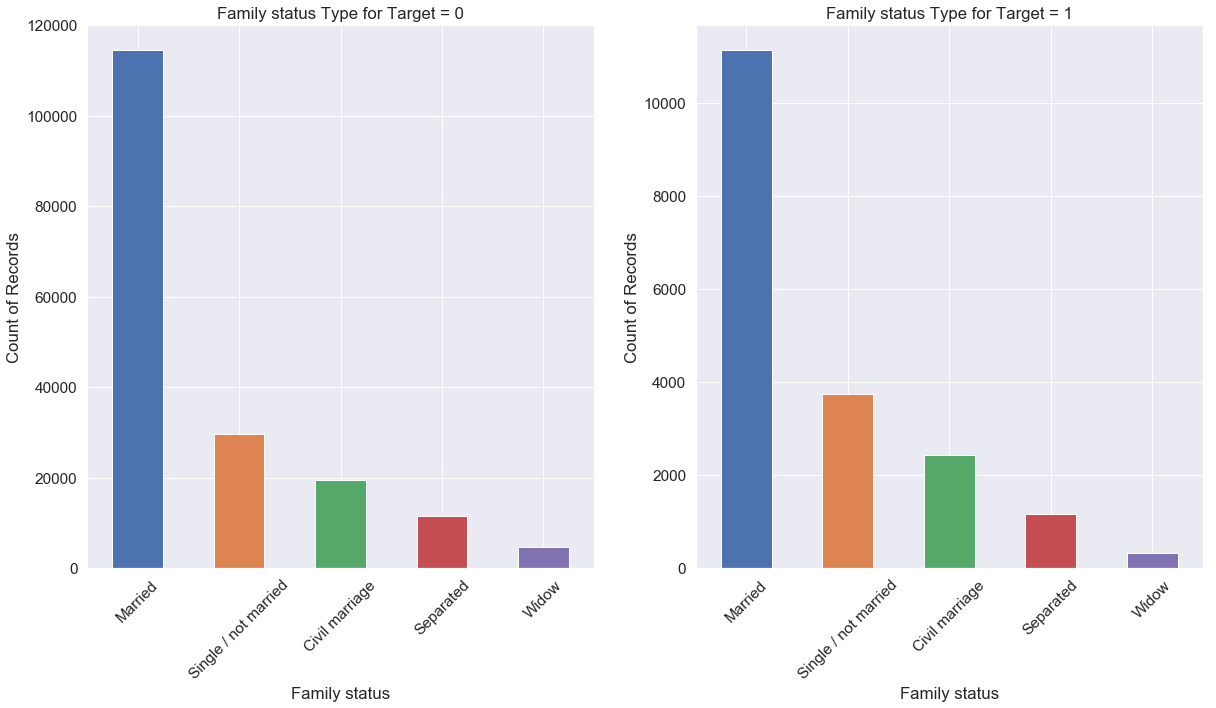

In [358]:
# NAME_FAMILY_STATUS
plt.figure(figsize=(20,10))
sns.set(font_scale=1.4)

plt.subplot(1,2,1)
df_application_data_0['NAME_FAMILY_STATUS'].value_counts().plot(kind='bar', rot=45)
plt.xlabel("Family status")
plt.ylabel("Count of Records")
plt.title("Family status Type for Target = 0");

plt.subplot(1,2,2)
df_application_data_1['NAME_FAMILY_STATUS'].value_counts().plot(kind='bar', rot=45)
plt.xlabel("Family status")
plt.ylabel("Count of Records")
plt.title("Family status Type for Target = 1");


In [359]:
print(df_application_data_0.shape)
print(df_application_data_1.shape)

(179819, 31)
(18799, 31)


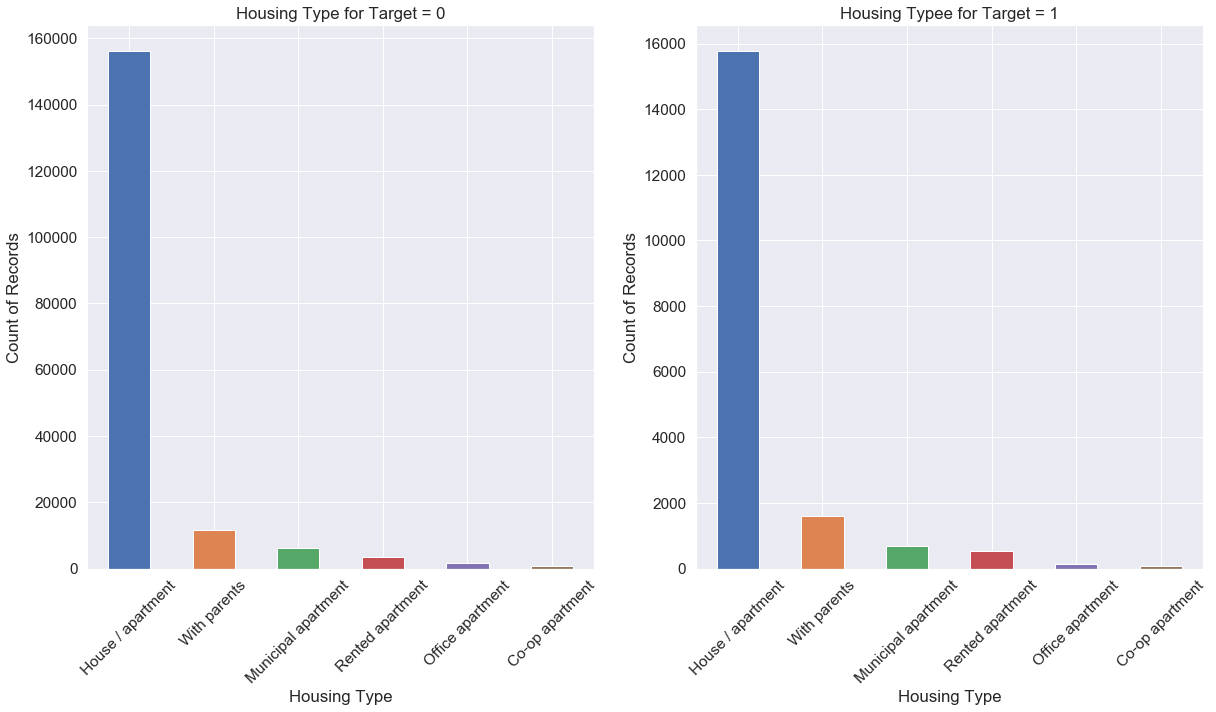

In [360]:
# NAME_HOUSING_TYPE
plt.figure(figsize=(20,10))
sns.set(font_scale=1.4)

plt.subplot(1,2,1)
df_application_data_0['NAME_HOUSING_TYPE'].value_counts().plot(kind='bar', rot=45)
plt.xlabel("Housing Type")
plt.ylabel("Count of Records")
plt.title("Housing Type for Target = 0");

plt.subplot(1,2,2)
df_application_data_1['NAME_HOUSING_TYPE'].value_counts().plot(kind='bar', rot=45)
plt.xlabel("Housing Type")
plt.ylabel("Count of Records")
plt.title("Housing Typee for Target = 1");


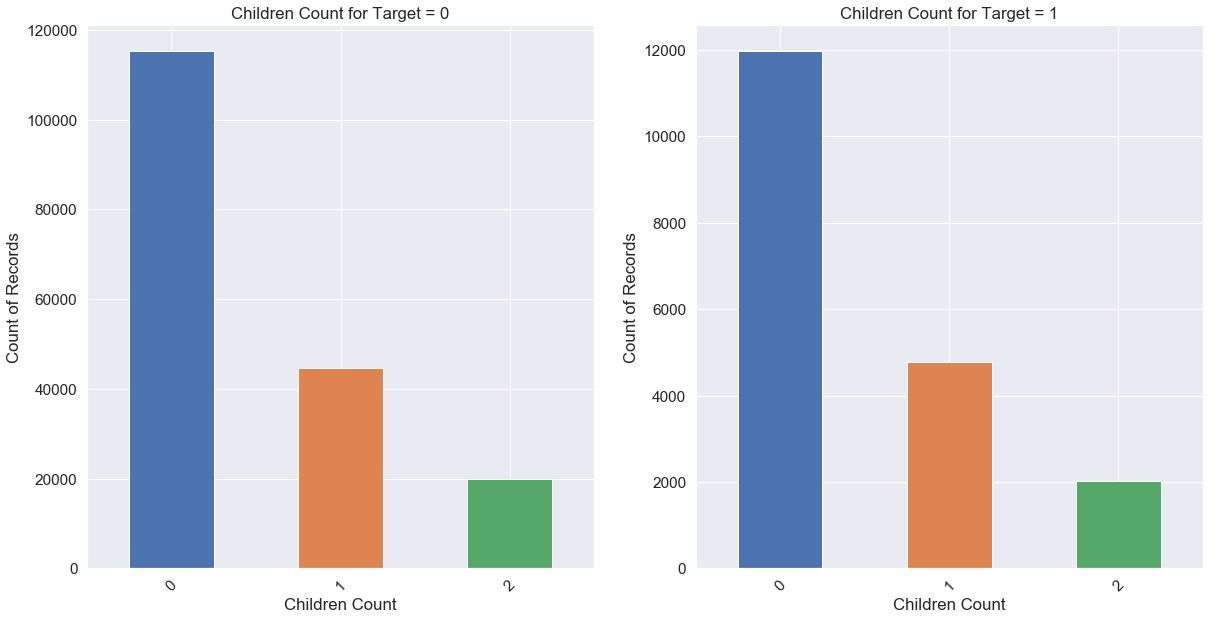

In [361]:
# CNT_CHILDREN
plt.figure(figsize=(20,10))
sns.set(font_scale=1.4)

plt.subplot(1,2,1)
df_application_data_0['CNT_CHILDREN'].value_counts().plot(kind='bar', rot=45)
plt.xlabel("Children Count")
plt.ylabel("Count of Records")
plt.title("Children Count for Target = 0");

plt.subplot(1,2,2)
df_application_data_1['CNT_CHILDREN'].value_counts().plot(kind='bar', rot=45)
plt.xlabel("Children Count")
plt.ylabel("Count of Records")
plt.title("Children Count for Target = 1");


##### 7.1.2 - Analysis for Univeriate

- Continuous Variables

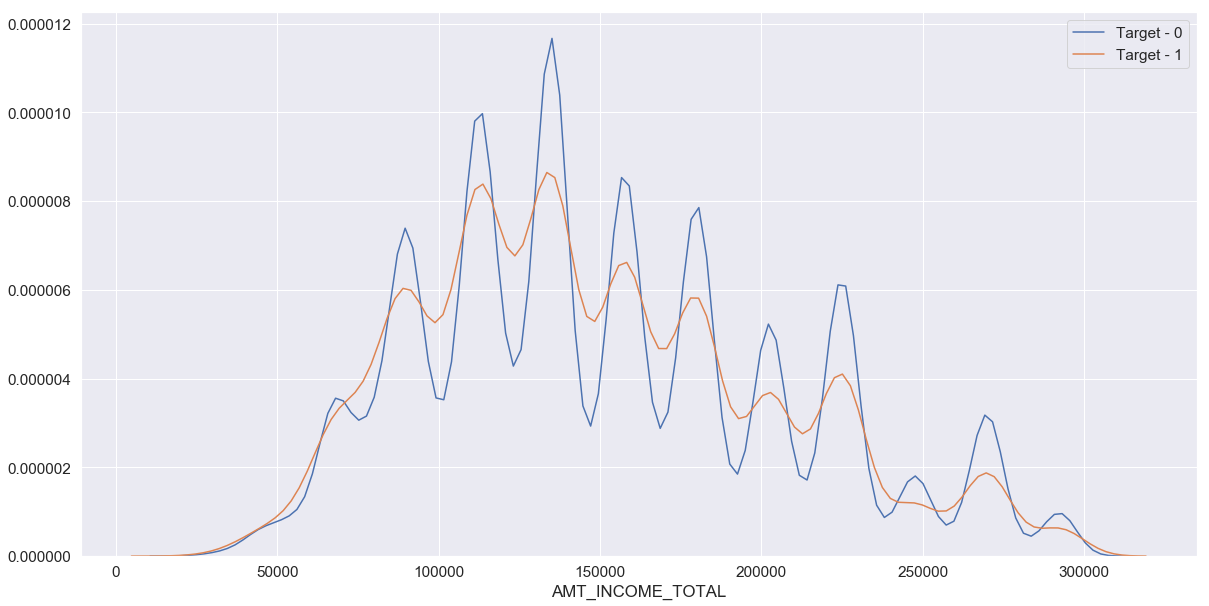

In [362]:
# AMT_INCOME_TOTAL
plt.figure(figsize=(20,10))
sns.set(font_scale=1.4)

sns.distplot(df_application_data_0['AMT_INCOME_TOTAL'], hist = False,label='Target - 0')
sns.distplot(df_application_data_1['AMT_INCOME_TOTAL'], hist = False,label='Target - 1')

plt.show()

Inferences - 
 - Loan applicant will lower income are more likely to face payments difficulties.

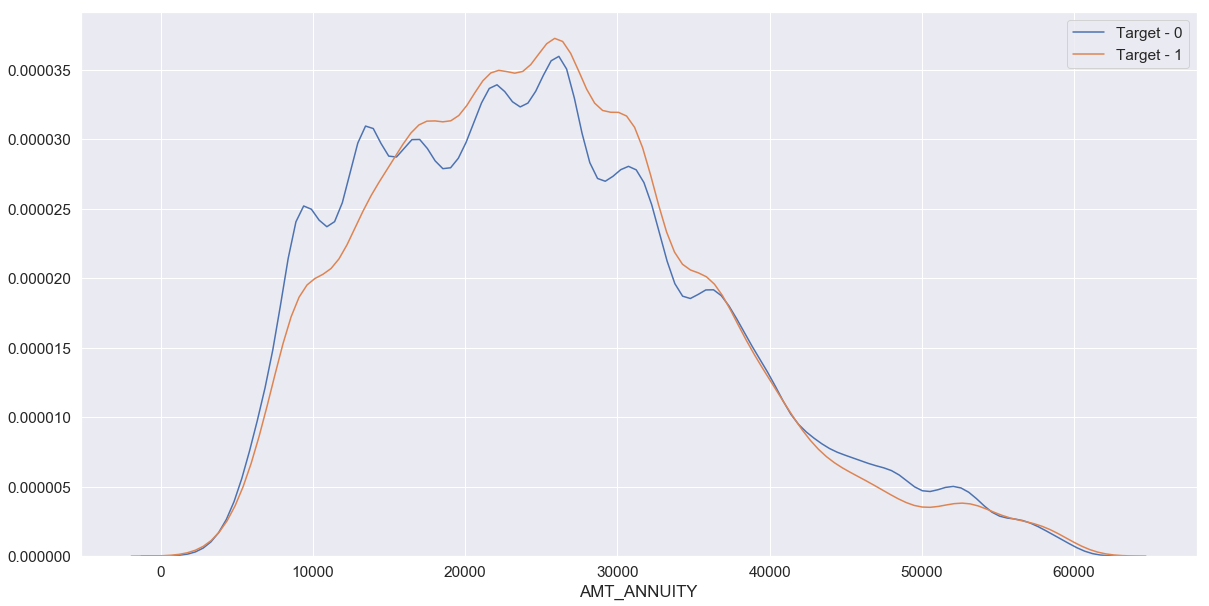

In [363]:
# AMT_INCOME_TOTAL
plt.figure(figsize=(20,10))
sns.set(font_scale=1.4)

sns.distplot(df_application_data_0['AMT_ANNUITY'], hist = False,label='Target - 0')
sns.distplot(df_application_data_1['AMT_ANNUITY'], hist = False,label='Target - 1')

plt.show()

Inferences - 
 - Loan applicant with higher AMT_CREDIT will have difficulties for loan payments.

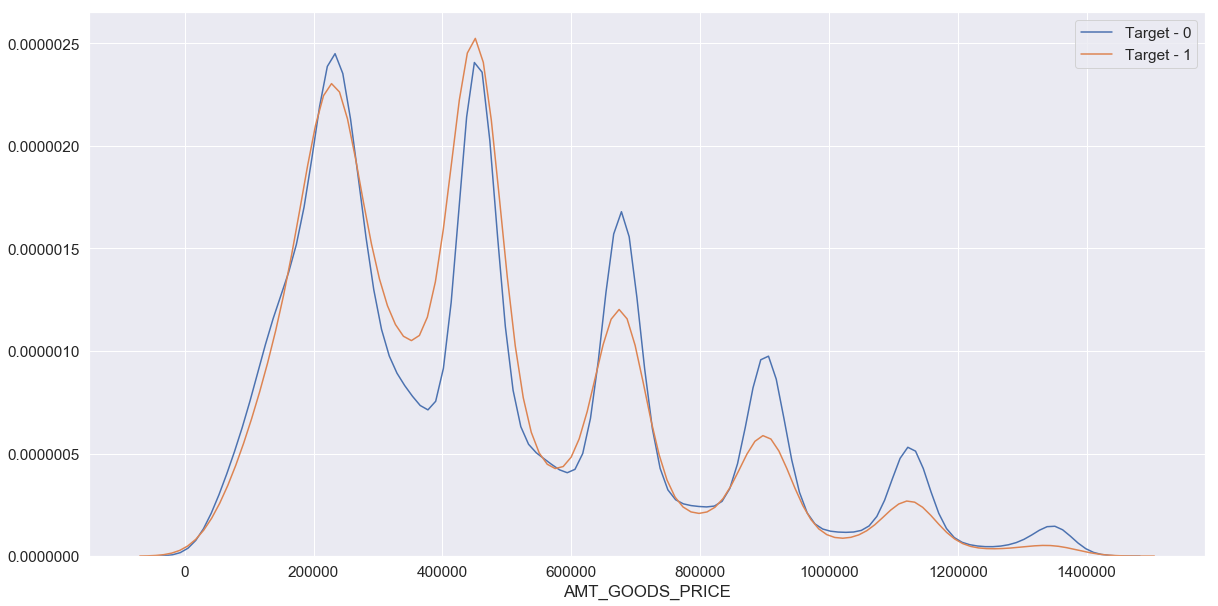

In [364]:
# AMT_GOODS_PRICE
plt.figure(figsize=(20,10))
sns.set(font_scale=1.4)

sns.distplot(df_application_data_0['AMT_GOODS_PRICE'], hist = False,label='Target - 0')
sns.distplot(df_application_data_1['AMT_GOODS_PRICE'], hist = False,label='Target - 1')

plt.show()

Inferences - 
 - This looks similar but on slight note we can observe Loan applicant for higher AMT_GOOD_PRICE have difficulties for loan payments.

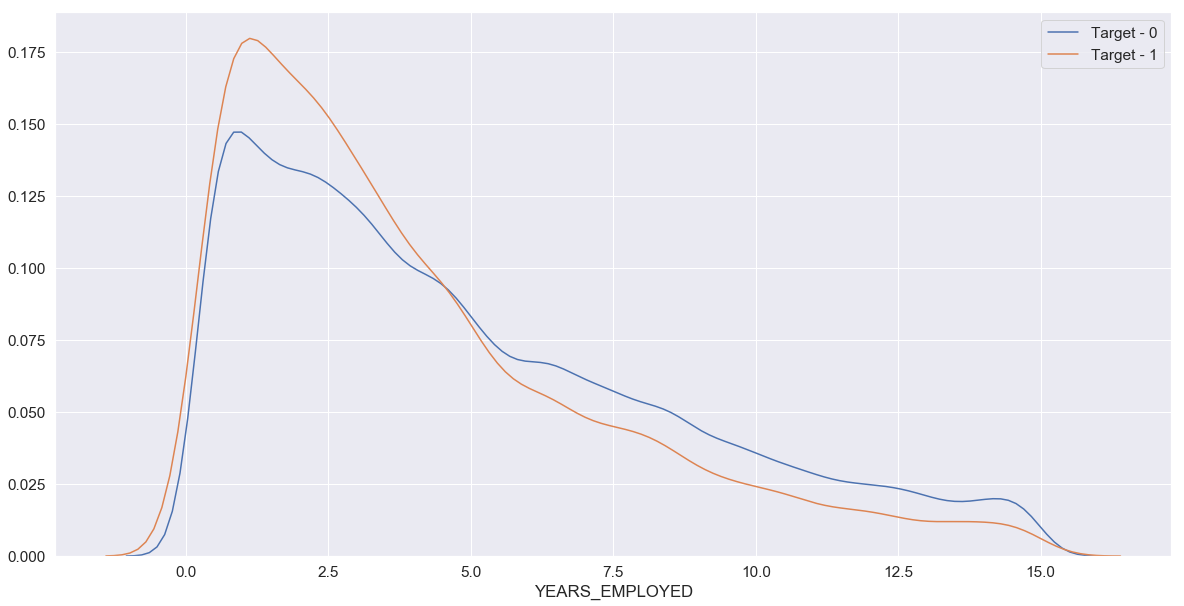

In [365]:
# YEARS_EMPLOYED
plt.figure(figsize=(20,10))
sns.set(font_scale=1.4)

sns.distplot(df_application_data_0['YEARS_EMPLOYED'], hist = False,label='Target - 0')
sns.distplot(df_application_data_1['YEARS_EMPLOYED'], hist = False,label='Target - 1')

plt.show()

Inferences - 
 - This looks similar but on slight note we can observe Loan applicant with higher YEARS_EMPLOYED have difficulties for loan payments.

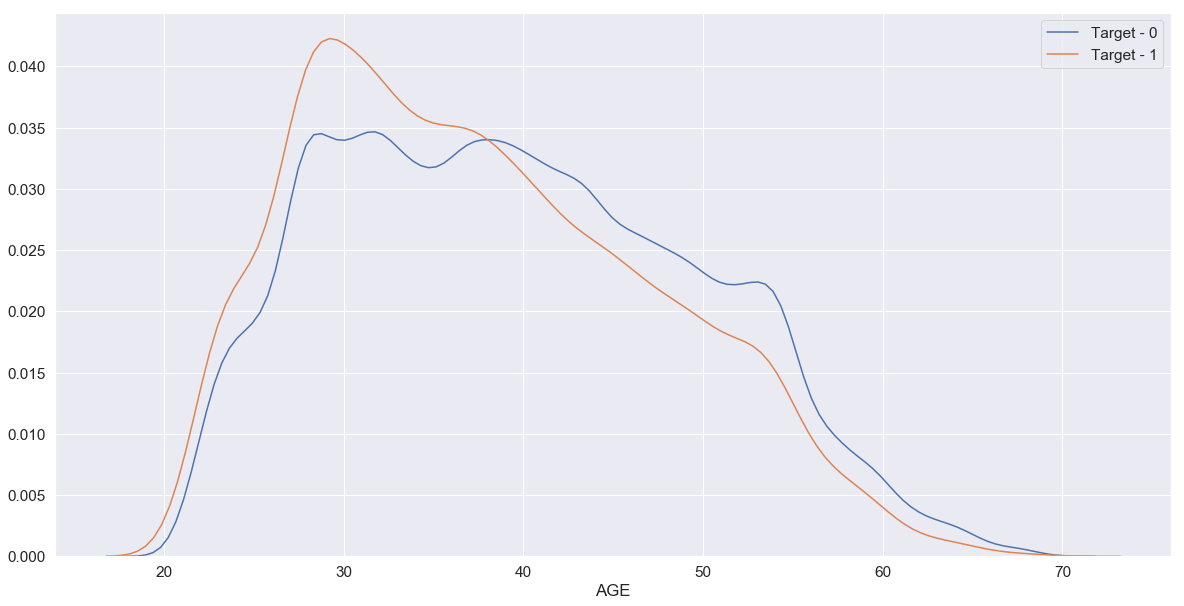

In [366]:
# AGE
plt.figure(figsize=(20,10))
sns.set(font_scale=1.4)

sns.distplot(df_application_data_0['AGE'], hist = False,label='Target - 0')
sns.distplot(df_application_data_1['AGE'], hist = False,label='Target - 1')

plt.show()

Inferences - 
 - This looks similar but on slight note we can observe Loan applicant with higher age have difficulties for loan payments.

#### 7.2 - Bivariate Analysis

#### 7.2.1 Analysis for Bivariate - Continuous - Continuous

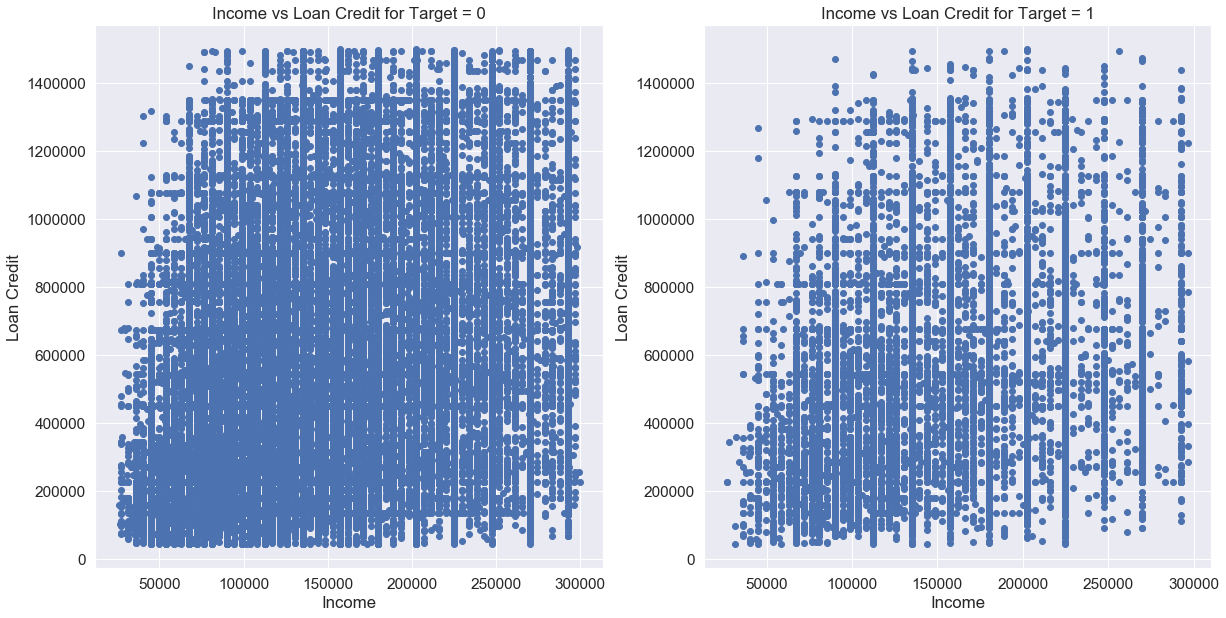

In [367]:
# AMT_INCOME_TOTAL vs AMT_CREDIT
plt.figure(figsize=(20,10))
# sns.set(font_scale=1.4)

plt.subplot(1,2,1)
plt.scatter(df_application_data_0.AMT_INCOME_TOTAL,df_application_data_0.AMT_CREDIT)
plt.xlabel("Income")
plt.ylabel("Loan Credit")
plt.title("Income vs Loan Credit for Target = 0");

plt.subplot(1,2,2)
plt.scatter(df_application_data_1.AMT_INCOME_TOTAL,df_application_data_1.AMT_CREDIT)
plt.xlabel("Income")
plt.ylabel("Loan Credit")
plt.title("Income vs Loan Credit for Target = 1");

plt.show()

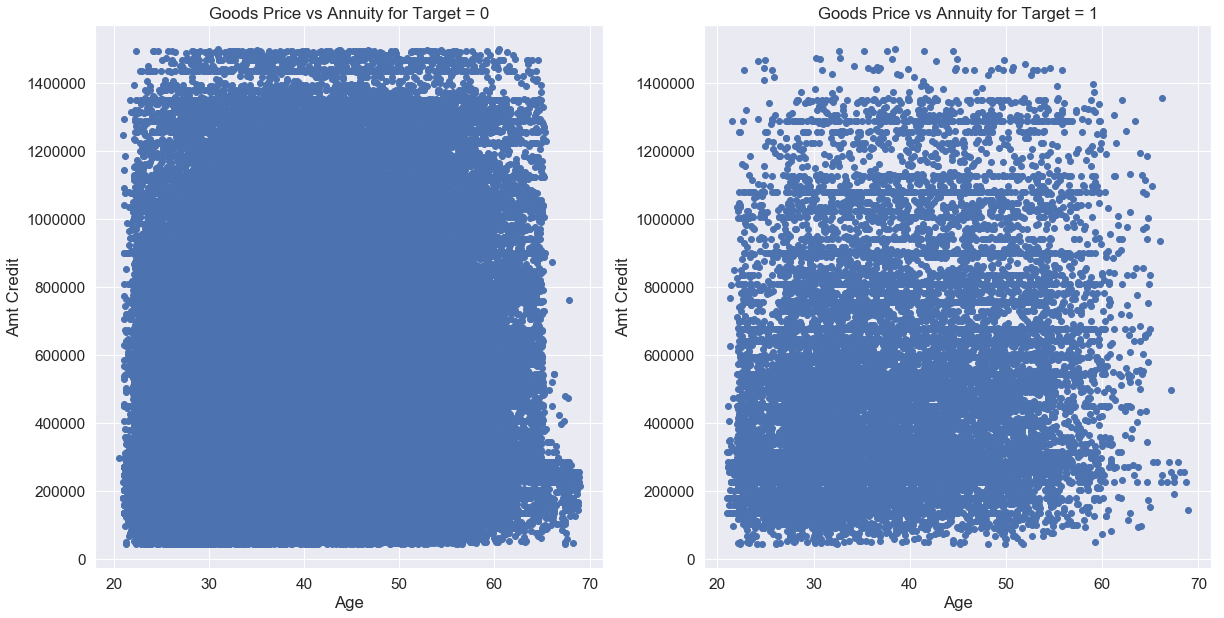

In [368]:
# AGE vs AMT_CREDIT
plt.figure(figsize=(20,10))
# sns.set(font_scale=1.4)

plt.subplot(1,2,1)
plt.scatter(df_application_data_0.AGE,df_application_data_0.AMT_CREDIT)
plt.xlabel("Age")
plt.ylabel("Amt Credit")
plt.title("Goods Price vs Annuity for Target = 0");

plt.subplot(1,2,2)
plt.scatter(df_application_data_1.AGE,df_application_data_1.AMT_CREDIT)
plt.xlabel("Age")
plt.ylabel("Amt Credit")
plt.title("Goods Price vs Annuity for Target = 1");

plt.show()

In [369]:
# previousDF1.groupby(["NAME_CASH_LOAN_PURPOSE"])["NAME_CONTRACT_STATUS_flag"].mean().plot.barh()

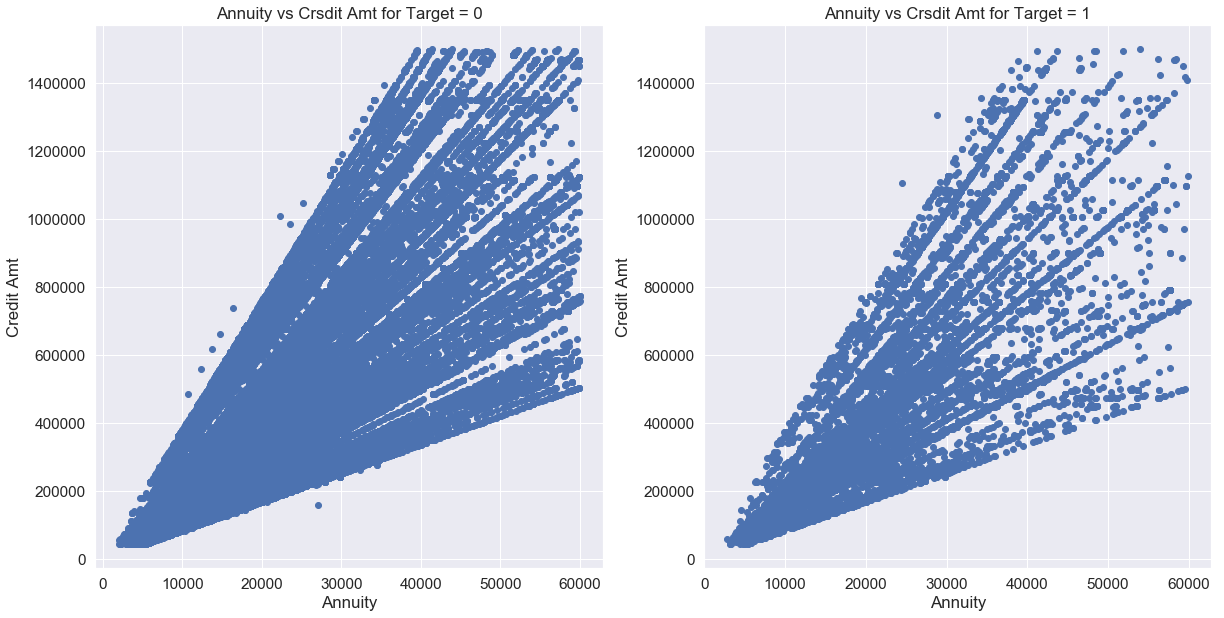

In [370]:
#  '   'AMT_CREDIT', 'AMT_ANNUITY'
plt.figure(figsize=(20,10))
# sns.set(font_scale=1.4)

plt.subplot(1,2,1)
plt.scatter(df_application_data_0.AMT_ANNUITY,df_application_data_0.AMT_CREDIT)
plt.xlabel("Annuity")
plt.ylabel("Credit Amt")
plt.title("Annuity vs Crsdit Amt for Target = 0");

plt.subplot(1,2,2)
plt.scatter(df_application_data_1.AMT_ANNUITY,df_application_data_1.AMT_CREDIT)
plt.xlabel("Annuity")
plt.ylabel("Credit Amt")
plt.title("Annuity vs Crsdit Amt for Target = 1");

plt.show()

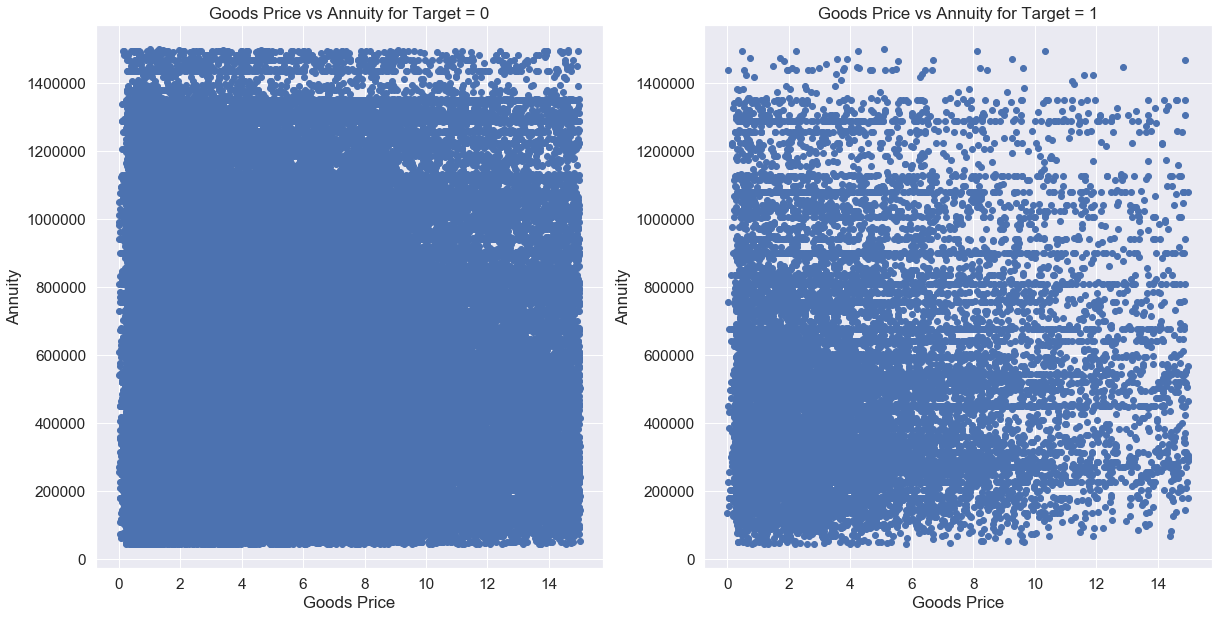

In [371]:
#  'YEARS_EMPLOYED' vs AMT_CREDIT
plt.figure(figsize=(20,10))
# sns.set(font_scale=1.4)

plt.subplot(1,2,1)
plt.scatter(df_application_data_0.YEARS_EMPLOYED,df_application_data_0.AMT_CREDIT)
plt.xlabel("Goods Price")
plt.ylabel("Annuity")
plt.title("Goods Price vs Annuity for Target = 0");

plt.subplot(1,2,2)
plt.scatter(df_application_data_1.YEARS_EMPLOYED,df_application_data_1.AMT_CREDIT)
plt.xlabel("Goods Price")
plt.ylabel("Annuity")
plt.title("Goods Price vs Annuity for Target = 1");

plt.show()

#### 7.2.2 Analysis for Bivariate - Categorical – Continuous

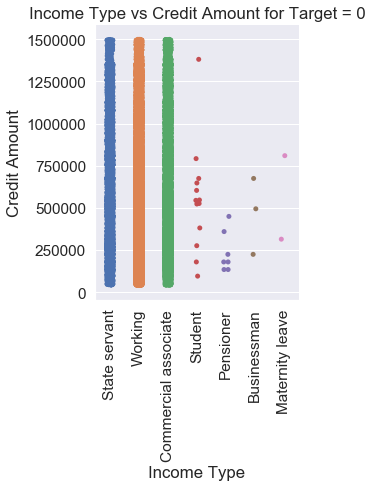

In [372]:
# NAME_INCOME_TYPE vs AMT_CREDIT' 
g = sns.catplot(x="NAME_INCOME_TYPE", y="AMT_CREDIT", data=df_application_data_0)
g.set_xticklabels(rotation=90)
plt.xlabel("Income Type")
plt.ylabel("Credit Amount")
plt.title("Income Type vs Credit Amount for Target = 0");
plt.show()

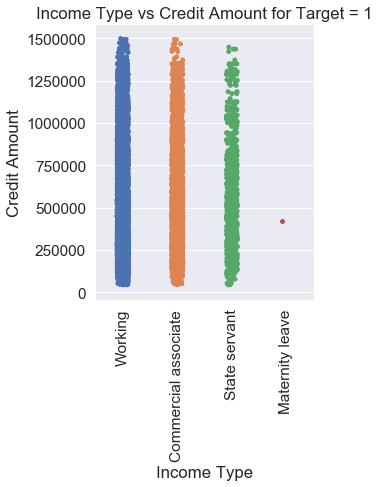

In [373]:
g = sns.catplot(x="NAME_INCOME_TYPE", y="AMT_CREDIT", data=df_application_data_1)
g.set_xticklabels(rotation=90)
plt.xlabel("Income Type")
plt.ylabel("Credit Amount")
plt.title("Income Type vs Credit Amount for Target = 1");
plt.show()

#### 7.2.3 Analysis for Bivariate - Categorical -Categorical

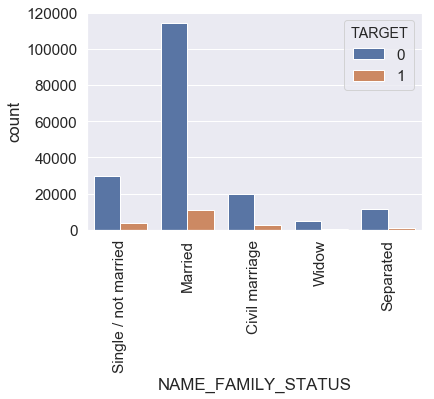

In [374]:
# compare NAME_FAMILY_STATUS with TARGET variavle
sns.countplot(x='NAME_FAMILY_STATUS',hue='TARGET',data=df_application_data)
plt.xticks(rotation=90)
plt.show()

Inferences - 
 - Applicant with Married family status are less likely to face payment difficulties.

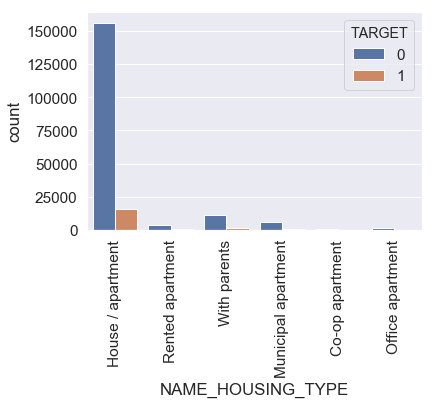

In [375]:
# compare NAME_FAMILY_STATUS with TARGET variavle
sns.countplot(x='NAME_HOUSING_TYPE',hue='TARGET',data=df_application_data)
plt.xticks(rotation=90)
plt.show()

Inferences - 
 - Applicant with House and Apartment housing type are less likely to face payment difficulties.

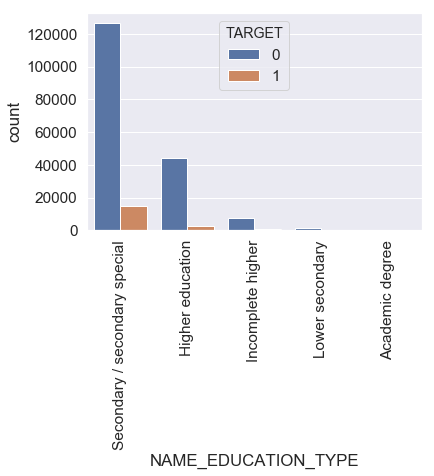

In [376]:
#ORGANIZATION_TYPE
sns.countplot(x='NAME_EDUCATION_TYPE',hue='TARGET',data=df_application_data)
plt.xticks(rotation=90)
plt.show()

Inferences -

Applicant with Secondary special education are more likely to pay loan payments.

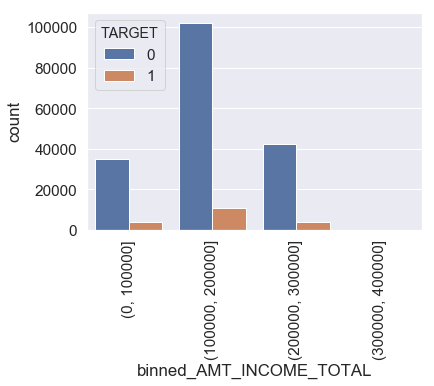

In [377]:
#binned_AMT_INCOME_TOTAL
sns.countplot(x='binned_AMT_INCOME_TOTAL',hue='TARGET',data=df_application_data)
plt.xticks(rotation=90)
plt.show()

Inferences -
- We have the same ratio with for payment difficulties for target variable 0 and 1

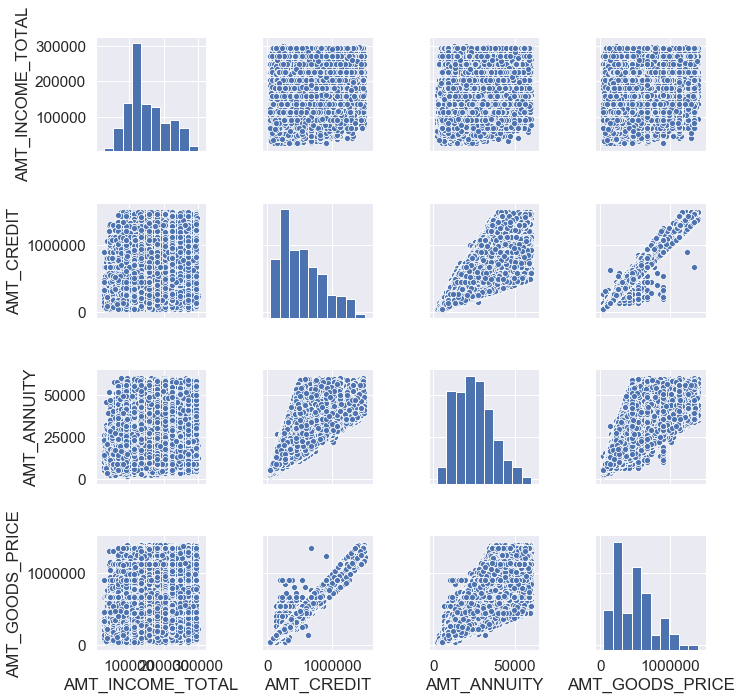

In [378]:
# pair plot
sns.pairplot(data=df_application_data_0, vars=[ 'AMT_INCOME_TOTAL',
                                               'AMT_CREDIT',
                                               'AMT_ANNUITY',
                                               'AMT_GOODS_PRICE'])
plt.show()

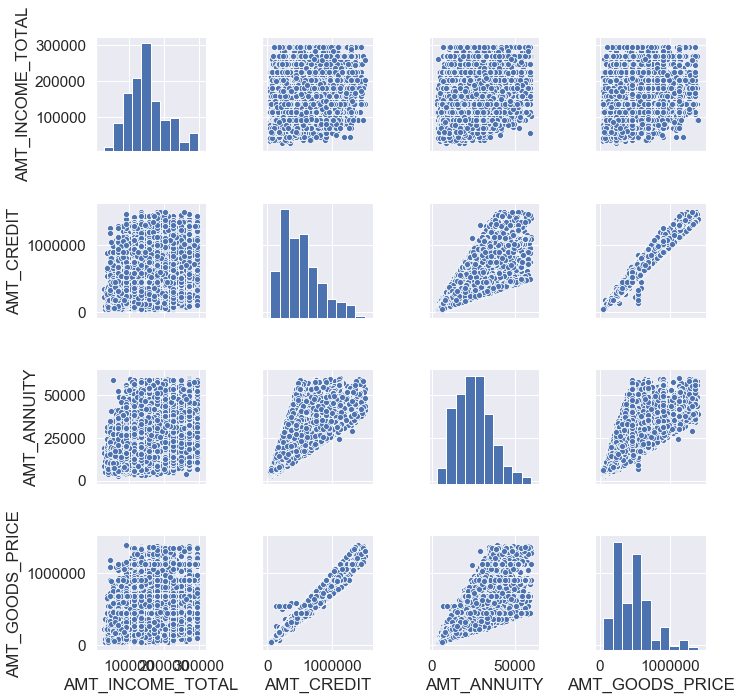

In [379]:
sns.pairplot(data=df_application_data_1, vars=[ 'AMT_INCOME_TOTAL',
                                               'AMT_CREDIT',
                                               'AMT_ANNUITY',
                                               'AMT_GOODS_PRICE'])
plt.show()